In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [259]:
data =pd.read_csv("winequality-red.csv")
print(data.head())




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [260]:
print(pd.value_counts(data["quality"]))


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


/tmp/ipykernel_15421/3570537853.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data["quality"]))


In [261]:
print(data.info())


print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

In [262]:
print(data["quality"].value_counts())



quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [263]:
def label_quality(value):
    if value <= 4:
        return 0   
    elif value <= 7:
        return 1   
    else:
        return 2   

data["quality"] = data["quality"].apply(label_quality)
print(data["quality"].value_counts())

quality
1    1518
0      63
2      18
Name: count, dtype: int64


In [264]:
X = data.drop(["quality"],axis=1)
Y =data["quality"]

x_train,x_test ,y_train ,y_test =train_test_split(X,Y ,test_size=0.2 ,random_state=42)

In [265]:
model =LogisticRegression(max_iter=10000)

model.fit(x_train ,y_train)

y_pred =model.predict(x_test)

# print(y_pred)

print("accuracy" ,accuracy_score(y_test ,y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix" ,confusion_matrix(y_test,y_pred))


accuracy 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.95      1.00      0.97       304
           2       0.00      0.00      0.00         5

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320

Confusion matrix [[  0  11   0]
 [  0 304   0]
 [  0   5   0]]


/mnt/malak/python/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/mnt/malak/python/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/mnt/malak/python/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [266]:
corr = data.corr()['quality'].sort_values(ascending=False)
print(corr)


quality                 1.000000
citric acid             0.119277
alcohol                 0.113394
sulphates               0.101258
fixed acidity           0.052590
free sulfur dioxide     0.051790
total sulfur dioxide    0.044545
residual sugar         -0.016897
density                -0.035580
chlorides              -0.051369
pH                     -0.097805
volatile acidity       -0.222998
Name: quality, dtype: float64


In [267]:
X = data.drop(["quality"],axis=1)
Y =data["quality"]

x_train,x_test ,y_train ,y_test =train_test_split(X,Y ,test_size=0.2 ,random_state=42 ,stratify=Y)

print("Unique classes in y_train:", y_train.unique())
print("Counts:\n", y_train.value_counts())
print(data["quality"].describe())
print(data["quality"].unique())



Unique classes in y_train: [1 0 2]
Counts:
 quality
1    1214
0      50
2      15
Name: count, dtype: int64
count    1599.000000
mean        0.971857
std         0.223374
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: quality, dtype: float64
[1 0 2]


In [268]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(x_train,y_train)


In [269]:
model =LogisticRegression(max_iter=10000 ,class_weight='balanced' , random_state=42)

model.fit(X_res ,y_res)

y_pred =model.predict(x_test)

# print(y_pred)

print("accuracy" ,accuracy_score(y_test ,y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix" ,confusion_matrix(y_test,y_pred))


accuracy 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.69      0.19        13
           1       0.97      0.60      0.74       304
           2       0.02      0.33      0.04         3

    accuracy                           0.60       320
   macro avg       0.37      0.54      0.32       320
weighted avg       0.93      0.60      0.71       320

Confusion matrix [[  9   3   1]
 [ 72 182  50]
 [  0   2   1]]


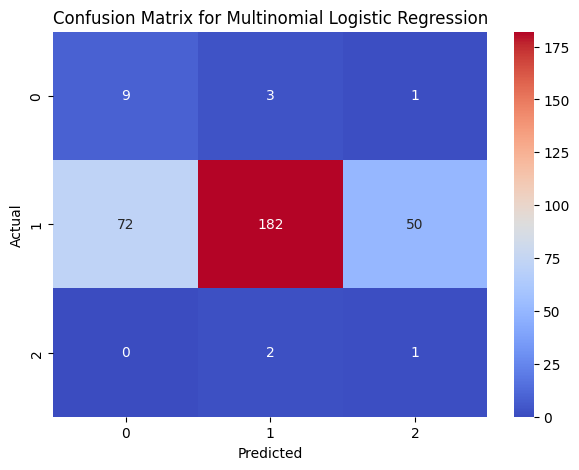

In [270]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Logistic Regression')
plt.show()